**Accident Severity Prediction**

Table of content <br>
[Introduction](#Introduction) <br>
[Data](#Data)<br>
[Data Cleaning](#DataCleaning)<br>
[EDA](#EDA)<br>
[Correlation](#Cor)

<a id = 'Introduction'></a>
**Introduction** <br>
Car accidents are the 8th cause of death in the world. This model is aimed at predicting when and where next accidents are likely ot occur. Therefore, these insighs could be useful to governments and common people.

**Data**
<a id = 'Data'></a>
The raw data comes from Kaggle and the datasets I am using here are refined in the previous notebook.

The features of the dataset resulting are the following:

1.characteristics: "lighting", "localisation"(agg), "type of intersection", "atmospheric conditions", "type of collisions", "department", "adress", "time", "coordinates", "date" and "weekend"


2.places: "road categorie", "traffic regime", "number of traffic lanes", "road profile", "road shape", "surface condition", "situation", "school nearby" and "infrastructure".

3.users dataset: num_us: total number of users involved in the accident, ped: Wether there are pedestrians involved or not.
critic_age: If there is any user in between 17 and 31 y.o., sev : maximum gravity suffered by any user involved in the accident:
0 = Unscathered or Light injury
1 = Hospitalized wonded or death <br>
I used the holiday dataset to craft a new feature indicating the accident accurred during a holiday.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

<a id='DataCleaning'></a>
**Data Cleaning**

In [4]:
df = pd.read_csv('Data.csv', index_col=0)
df.head(10)

,ID,hhmm,light,agg,int,atm,col,con,lat,long,...,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday,time
0,201600000001,1445,1,2,1,8.0,3.0,5.0,0.0,0,...,0.0,0,0,0,2,1,2016-02-01,0,0.0,14.0
1,201600000002,1800,1,2,6,1.0,6.0,5.0,0.0,0,...,0.0,0,0,0,3,1,2016-03-16,0,0.0,18.0
2,201600000003,1900,1,1,1,1.0,6.0,11.0,0.0,0,...,99.0,1,1,0,2,0,2016-07-13,0,0.0,19.0
3,201600000004,1930,2,2,1,7.0,3.0,477.0,0.0,0,...,99.0,1,0,0,3,1,2016-08-15,0,1.0,19.0
4,201600000005,1100,1,2,3,1.0,3.0,11.0,0.0,0,...,3.0,0,0,0,3,1,2016-12-23,0,0.0,11.0
5,201600000006,1115,1,2,1,7.0,6.0,11.0,0.0,0,...,99.0,0,1,0,2,1,2016-12-23,0,0.0,11.0
6,201600000007,1145,1,2,1,7.0,2.0,51.0,0.0,0,...,99.0,0,0,0,3,0,2016-05-01,1,1.0,11.0
7,201600000008,1915,2,1,1,1.0,1.0,250.0,0.0,0,...,0.0,0,0,0,3,1,2016-05-14,1,0.0,19.0
8,201600000009,1900,1,2,1,1.0,3.0,51.0,0.0,0,...,99.0,0,0,0,2,0,2016-09-23,0,0.0,19.0
9,201600000010,1030,1,1,1,9.0,6.0,303.0,0.0,0,...,0.0,0,1,0,2,0,2016-12-30,0,0.0,10.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         839985 non-null  int64  
 1   hhmm       839985 non-null  int64  
 2   light      839985 non-null  int64  
 3   agg        839985 non-null  int64  
 4   int        839985 non-null  int64  
 5   atm        839930 non-null  float64
 6   col        839974 non-null  float64
 7   con        839983 non-null  float64
 8   lat        362471 non-null  float64
 9   long       362467 non-null  object 
 10  dep        839985 non-null  int64  
 11  road_cat   839984 non-null  float64
 12  road_num   780914 non-null  object 
 13  traf_reg   839187 non-null  float64
 14  num_lanes  838195 non-null  float64
 15  res_lane   838345 non-null  float64
 16  long_prof  838924 non-null  float64
 17  shape      838909 non-null  float64
 18  surf       838968 non-null  float64
 19  infra      838707 non-n

In [6]:
df.drop(['lat','long','road_num'], axis=1, inplace=True)#because are the variables with many missing values

In [7]:
print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 55 
Missing values in collision: 11 
Missing values in road_cat: 1 
Missing values in surf: 1017


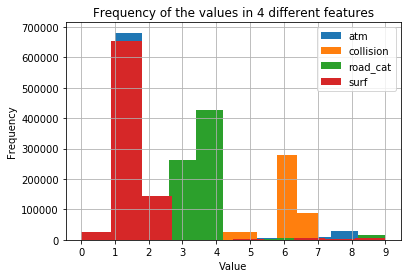

In [8]:
df['atm'].hist(label='atm')
df['col'].hist(label='collision')
df['road_cat'].hist(label='road_cat')
df['surf'].hist(label='surf')
plt.title('Frequency of the values in 4 different features')
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend() #to spot outliers

In [9]:
# replacing the missing values with value "autre" meaning it is not specified
df['atm'].fillna(9,inplace=True)
df['col'].fillna(6,inplace=True)
df['road_cat'].fillna(9,inplace=True)
df['surf'].fillna(9,inplace=True)
df['surf'].replace(0,9,inplace=True)

In [10]:
df[['traf_reg', 'num_lanes','res_lane', 'long_prof', 'shape', 'infra', 'situation']].describe()

,traf_reg,num_lanes,res_lane,long_prof,shape,infra,situation
count,839187.000000,838195.000000,838345.000000,838924.000000,838909.000000,838707.000000,838983.000000
mean,1.855246,2.039593,0.130675,1.135474,1.198732,0.438958,1.147201
std,0.720949,1.550779,0.555434,0.620295,0.722200,1.350905,0.722495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,99.000000,3.000000,4.000000,4.000000,7.000000,5.000000


In [11]:
df.drop(['infra', 'res_lane'], axis=1, inplace=True)

In [12]:
df['num_lanes'].value_counts()

2.0     464716
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
14.0         6
24.0         6
70.0         5
22.0         5
31.0         3
60.0         3
17.0         2
16.0         2
53.0         2
27.0         2
45.0         2
41.0         1
44.0         1
33.0         1
29.0         1
52.0         1
39.0         1
28.0         1
36.0         1
62.0         1
42.0         1
76.0         1
65.0         1
84.0         1
23.0         1
91.0         1
54.0         1
18.0         1
86.0         1
99.0         1
Name: num_lanes, dtype: int64

In [13]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    573670
1.0    101345
4.0     76934
3.0     66252
6.0     13945
5.0      7839
Name: num_lanes, dtype: int64

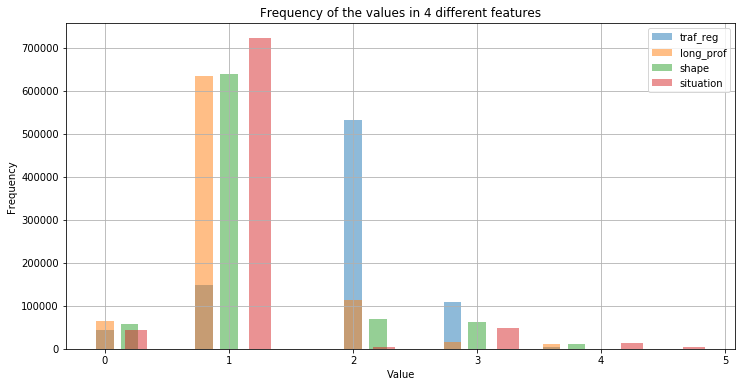

In [14]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
#Most frequent value for the traffic situation, road profile and shape is 1, while for the traffic regime is 2.

In [15]:
df['traf_reg'].fillna(0, inplace=True)
df['traf_reg'] = df['traf_reg'].replace(0,2)

df['long_prof'].fillna(0, inplace=True)
df['long_prof'] = df['long_prof'].replace(0,1)

df['shape'].fillna(0, inplace=True)
df['shape'] = df['shape'].replace(0,1)

df['situation'].fillna(0, inplace=True)
df['situation'] = df['situation'].replace(0,1)

Text(0.5, 1.0, 'School feature values')

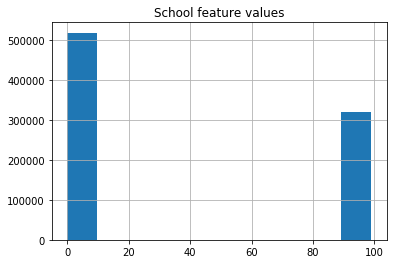

In [16]:

df.school.describe(), df.school.hist()
plt.title('School feature values')

In [17]:
df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

As is described in the kaggle metadata the department feature has a 0 added to the right. I will eliminate 0s so that the values range from 1 to 97.

In [18]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         839985 non-null  int64  
 1   hhmm       839985 non-null  int64  
 2   light      839985 non-null  int64  
 3   agg        839985 non-null  int64  
 4   int        839985 non-null  int64  
 5   atm        839985 non-null  float64
 6   col        839985 non-null  float64
 7   con        839983 non-null  float64
 8   dep        839985 non-null  int32  
 9   road_cat   839985 non-null  float64
 10  traf_reg   839985 non-null  float64
 11  num_lanes  839985 non-null  float64
 12  long_prof  839985 non-null  float64
 13  shape      839985 non-null  float64
 14  surf       839985 non-null  float64
 15  situation  839985 non-null  float64
 16  school     839985 non-null  int64  
 17  crit_age   839985 non-null  int64  
 18  ped        839985 non-null  int64  
 19  dead_age   839985 non-n

<a id='EDA'></a>
**EDA**

This section is aiming to gain a better understanding of the data summarizing the main characteristics as well as uncovering importan relationships of the features with the severity of an accident.

Severity <br>
The data is almost evenly distributed on both high and low severity accidents.

Accidents classified in each level of severity:
1    446530
0    393455
Name: sev, dtype: int64


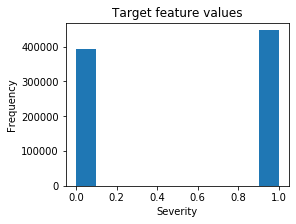

In [20]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

Seasonality <br>
The number of traffic accidents decreased over the years from 2005 to 2013, after which the trend became stable.\ Analyszing the yearly trend there is a seasonal pattern where the number of accidents increase around March and then again in September.\ Regarding the day of the week there is not a significant difference between them. There is a steady trend during the week with more accidents on friday, and sunday is the day with less accident of all.\ Lastly analyzing the accidents per hour, there are clearly two spikes, one at 8am, the time people go to work and another one between 5 and 6pm, time when people return home. The number of accidents decreases between these two spikes, nothing unusual but it proves there is a pattern here.

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date.date

0        2016-02-01
1        2016-03-16
2        2016-07-13
3        2016-08-15
4        2016-12-23
            ...    
839980   2005-12-21
839981   2005-12-23
839982   2005-12-26
839983   2005-12-27
839984   2005-12-31
Name: date, Length: 839985, dtype: datetime64[ns]

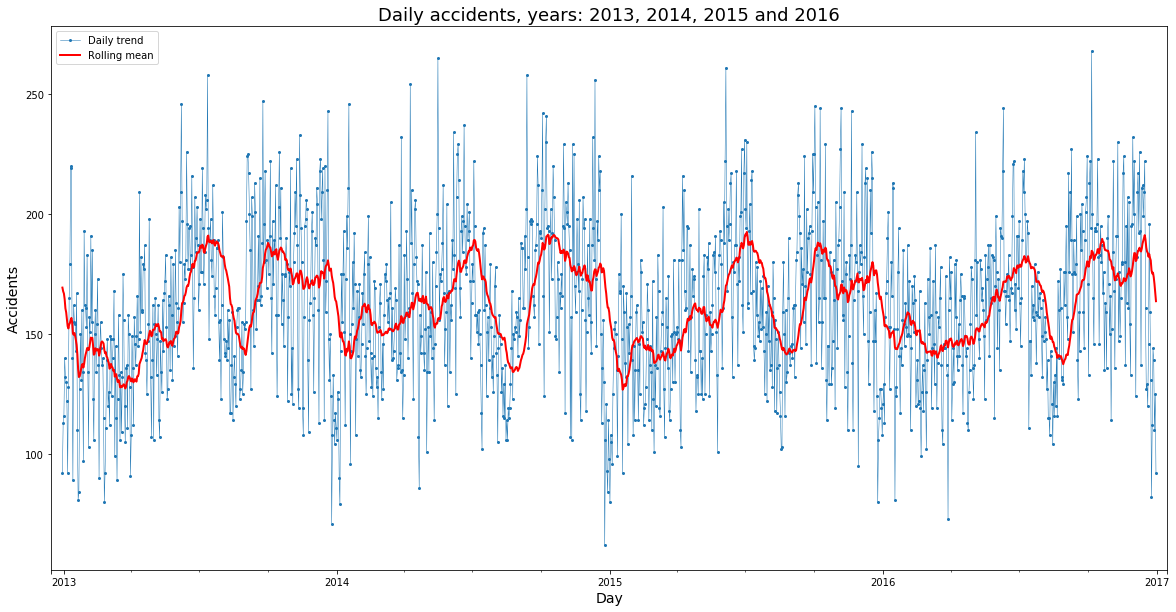

In [22]:
#Seasonality

date['year'] = df.date.dt.year
date['month'] = df.date.dt.month
date['weekday'] = df.date.dt.weekday
high_sev = date[date['sev']==1]

season = date[['date', 'ID']].groupby('date').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2013, 2014, 2015 and 2016', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2017-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

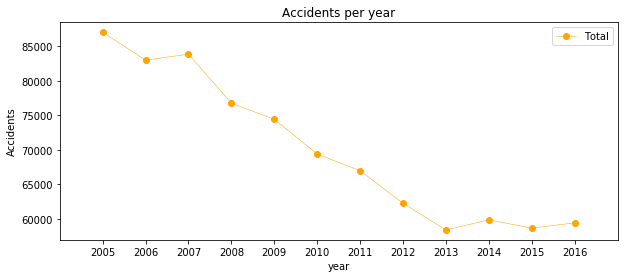

In [23]:
#By year

yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

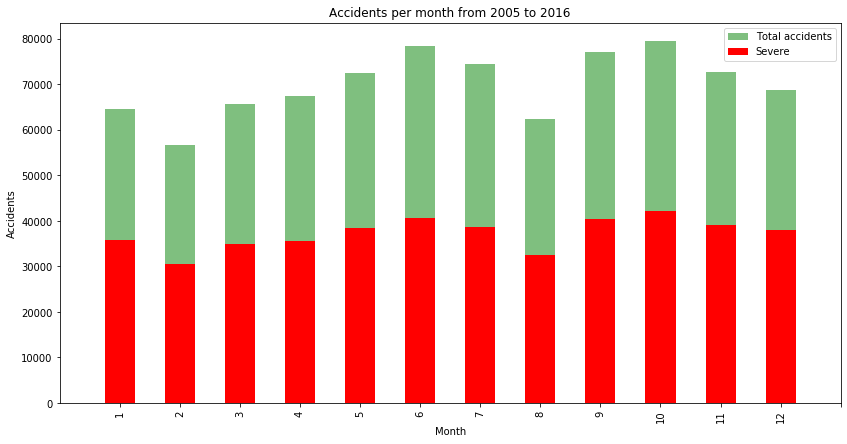

In [24]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')
monthly['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per month from 2005 to 2016')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

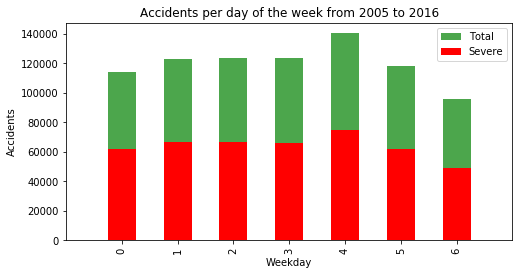

In [25]:
#By day of the week

weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='g', label='Total')
weekday['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

The trend of highly severe accidents is proportional to the global trend, for both the accidents divided per month of the year and per day of the week.

839985

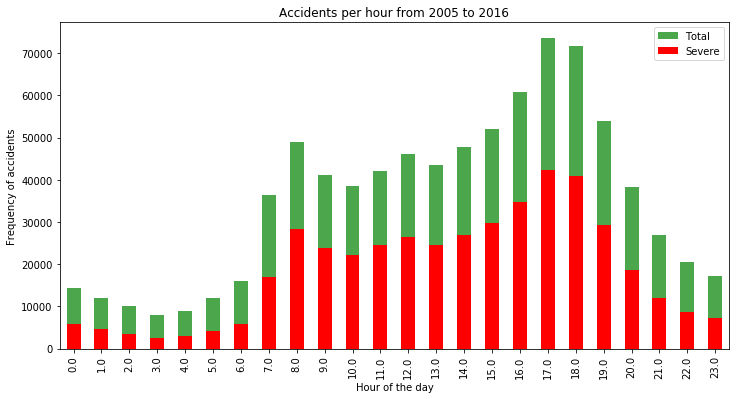

In [26]:
#By hour of the day

hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
hourly['ID'].sum()

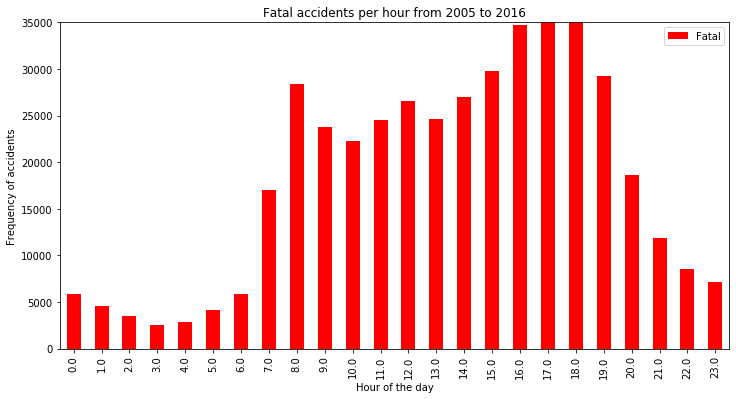

In [27]:
#Zoom in fatal accidents by hour of the day

hourly['high_sev'].plot.bar(figsize=(12,6),color='r', label='Fatal')
plt.xticks(range(24))
plt.ylim((0,35000))
plt.title('Fatal accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()


Same as for the monthly and weekly trends, zooming on the amount of highly severe accidents by hour of the day we have quite a simliar shape as for the total amount of accidents. One aspect to highlight from the hourly trend is that the proportion of severe accidents from noon to morning is higher.

In [28]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100
print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 39.07% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 56.11%.


In [29]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [30]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
          ..
839980    21
839981    23
839982    26
839983    27
839984    31
Name: day, Length: 839985, dtype: int64>

<a id = 'Cor'></a>
**Correlation**

In [31]:
df[['sev','light', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
num_us       0.294611
ped          0.111866
dead_age     0.048845
agg          0.024880
crit_age     0.021933
int          0.016606
atm          0.014963
school       0.014132
road_cat     0.006919
traf_reg     0.006548
num_lanes    0.000294
month       -0.001118
day         -0.002681
holiday     -0.003232
surf        -0.007229
long_prof   -0.011082
weekend     -0.015111
dep         -0.032767
shape       -0.044117
situation   -0.071296
col         -0.072436
light       -0.087245
Name: sev, dtype: float64

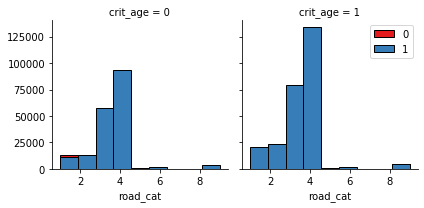

In [32]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

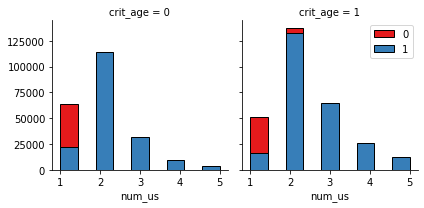

In [33]:
bins = np.linspace(df.light.min(), df.light.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

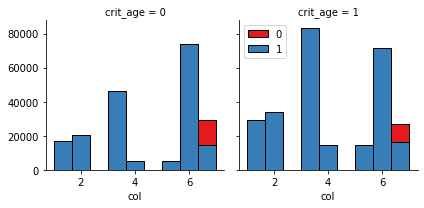

In [34]:
bins = np.linspace(df.col.min(), df.col.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

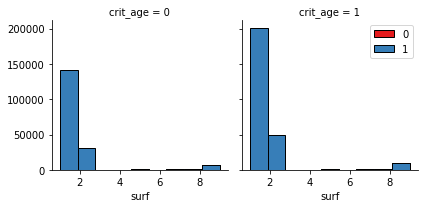

In [35]:
bins = np.linspace(df.surf.min(), df.surf.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'surf', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Text(0.5, 0, 'Severity')

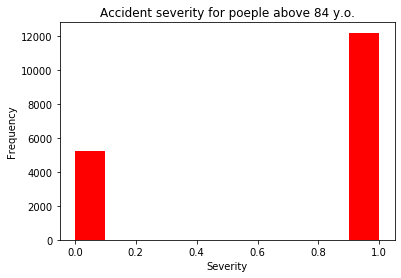

In [36]:
df['sev'][df['dead_age']==1].plot.hist(color='r')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

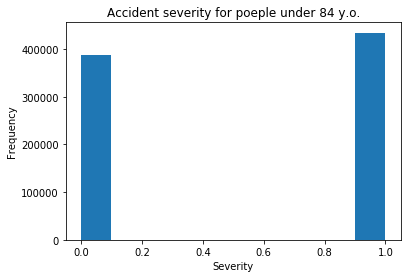

In [37]:
df['sev'][df['dead_age']==0].plot.hist()
plt.title('Accident severity for poeple under 84 y.o.')
plt.xlabel('Severity')

From the correlation of each feature individualy with the severity, there is not a significant correlation in any of the cases. However, from the plots above we can say that gathering together some combinations of the features, these combinations could be classified in the different severity categories.